In [5]:
from hurricanes.platforms import get_active_gliders
from hurricanes.regions import region_config
import pandas as pd

In [8]:
region = 'gom'
time_end = pd.Timestamp.now()
time_start = time_end - pd.Timedelta(days=2)
region, time_end, time_start

('gom',
 Timestamp('2022-07-11 15:38:05.510090'),
 Timestamp('2022-07-09 15:38:05.510090'))

In [6]:
# Get extent of region
configs = region_config(region)
configs

OrderedDict([('name', 'Gulf of Mexico'),
             ('folder', 'gulf_of_mexico'),
             ('extent', [-99, -79, 18, 31]),
             ('currents',
              {'bool': True,
               'depths': [0, 150, 200],
               'coarsen': {'rtofs': 7, 'gofs': 8},
               'kwargs': {'ptype': 'streamplot', 'color': 'black'}}),
             ('salinity_max', {'figsize': (14, 6.5), 'limits': [36, 37, 0.1]}),
             ('figure', {'legend': {'columns': 7}, 'figsize': (13, 7.5)}),
             ('sea_surface_height',
              [{'depth': 0, 'limits': [-0.6, 0.7, 0.1]}]),
             ('eez', False),
             ('variables',
              {'salinity': [{'depth': 0, 'limits': [34, 36.7, 0.1]},
                {'depth': 150, 'limits': [35.9, 36.7, 0.1]},
                {'depth': 200, 'limits': [35.7, 36.8, 0.1]}],
               'temperature': [{'depth': 0, 'limits': [27, 32, 0.5]},
                {'depth': 150, 'limits': [14, 26, 0.5]},
                {'depth': 200,

In [10]:
gliders = get_active_gliders(configs['extent'], time_start, time_end, parallel=True)
gliders

('Found 4 Glider Datasets: mote-dora-20220627T1200, ng599-20220622T0000, '
 'sp062-20220623T1419, usf-gansett-20220705T1200')


lat        lon
glider                    time                                     
mote-dora-20220627T1200   2022-07-09 15:51:27  26.728623 -83.249820
                          2022-07-09 15:54:12  26.728302 -83.250096
                          2022-07-09 16:30:06  26.725269 -83.252840
                          2022-07-09 16:32:55  26.724973 -83.253195
                          2022-07-09 16:55:25  26.722605 -83.256034
...                                                  ...        ...
usf-gansett-20220705T1200 2022-07-11 12:13:25  27.733727 -84.249916
                          2022-07-11 12:43:41  27.732698 -84.251493
                          2022-07-11 13:06:23  27.731927 -84.252676
                          2022-07-11 13:35:21  27.730943 -84.254185
                          2022-07-11 13:57:30  27.730191 -84.255339

[297 rows x 2 columns]

In [12]:
vars = ['time', 'latitude', 'longitude', 'depth', 'temperature', 'salinity',
        'density', 'profile_id', 'pressure']

gliders = get_active_gliders(configs['extent'], time_start, time_end, variables=vars, parallel=True).reset_index()
gliders

('Found 4 Glider Datasets: mote-dora-20220627T1200, ng599-20220622T0000, '
 'sp062-20220623T1419, usf-gansett-20220705T1200')


,glider,time,lat,lon,depth,temperature,salinity,density,profile_id,pressure
0,mote-dora-20220627T1200,2022-07-09 15:51:27,26.728623,-83.249820,4.410850,30.0651,36.559980,1028.7974,1657381886,4.4400
1,mote-dora-20220627T1200,2022-07-09 15:51:27,26.728623,-83.249820,5.841375,30.0482,36.559395,1028.8037,1657381886,5.8800
2,mote-dora-20220627T1200,2022-07-09 15:51:27,26.728623,-83.249820,7.162615,30.0270,36.561480,1028.8118,1657381886,7.2100
3,mote-dora-20220627T1200,2022-07-09 15:51:27,26.728623,-83.249820,8.523583,29.9943,36.557200,1028.8152,1657381886,8.5800
4,mote-dora-20220627T1200,2022-07-09 15:51:27,26.728623,-83.249820,9.665995,29.9663,36.558280,1028.8218,1657381886,9.7300
...,...,...,...,...,...,...,...,...,...,...
21693,usf-gansett-20220705T1200,2022-07-11 13:57:30,27.730191,-84.255339,7.963106,30.8475,35.994360,1028.3665,1657547851,8.0164
21694,usf-gansett-20220705T1200,2022-07-11 13:57:30,27.730191,-84.255339,6.893185,31.0415,35.401505,1027.9019,1657547851,6.9393
21695,usf-gansett-20220705T1200,2022-07-11 13:57:30,27.730191,-84.255339,5.838655,30.7027,34.013504,1026.8309,1657547851,5.8777
21696,usf-gansett-20220705T1200,2022-07-11 13:57:30,27.730191,-84.255339,4.494260,30.5942,33.892067,1026.7323,1657547851,4.5243


In [21]:
gliders['glider'].unique()

array(['mote-dora-20220627T1200', 'ng599-20220622T0000',
       'sp062-20220623T1419', 'usf-gansett-20220705T1200'], dtype=object)

In [22]:
mask = gliders['glider'] == 'ng599-20220622T0000'

glider = gliders[mask]
glider

,glider,time,lat,lon,depth,temperature,salinity,density,profile_id,pressure
3199,ng599-20220622T0000,2022-07-09 16:33:44,27.110756,-91.202705,0.316827,30.8744,35.481308,1021.78620,1657384424,0.318927
3200,ng599-20220622T0000,2022-07-09 16:33:44,27.110756,-91.202705,0.267323,31.0186,35.463753,1021.72253,1657384424,0.269094
3201,ng599-20220622T0000,2022-07-09 16:33:44,27.110756,-91.202705,0.257422,31.0457,35.465930,1021.71460,1657384424,0.259128
3202,ng599-20220622T0000,2022-07-09 16:33:44,27.110756,-91.202705,0.277224,30.9728,35.476624,1021.74817,1657384424,0.279061
3203,ng599-20220622T0000,2022-07-09 16:33:44,27.110756,-91.202705,0.257422,31.1708,35.498940,1021.69550,1657384424,0.259128
...,...,...,...,...,...,...,...,...,...,...
16118,ng599-20220622T0000,2022-07-10 21:45:01,27.141176,-91.458488,935.382100,5.1812,34.934578,1031.93160,1657489501,943.724000
16119,ng599-20220622T0000,2022-07-10 21:45:01,27.141176,-91.458488,935.934100,5.1803,34.934660,1031.93430,1657489501,944.282170
16120,ng599-20220622T0000,2022-07-10 21:45:01,27.141176,-91.458488,936.387500,5.1801,34.934753,1031.93650,1657489501,944.740660
16121,ng599-20220622T0000,2022-07-10 21:45:01,27.141176,-91.458488,936.712770,5.1745,34.935700,1031.93960,1657489501,945.069600


In [26]:
for profile, df in glider.groupby('profile_id'):
    print(f"Profile ID:{profile} - Points: {df.shape[0]}")

Profile ID:1657384424 - Points: 874
Profile ID:1657389987 - Points: 537
Profile ID:1657396738 - Points: 910
Profile ID:1657402444 - Points: 537
Profile ID:1657409310 - Points: 893
Profile ID:1657414965 - Points: 539
Profile ID:1657421725 - Points: 901
Profile ID:1657427450 - Points: 539
Profile ID:1657434151 - Points: 894
Profile ID:1657439825 - Points: 541
Profile ID:1657446549 - Points: 901
Profile ID:1657452256 - Points: 545
Profile ID:1657459003 - Points: 906
Profile ID:1657464725 - Points: 539
Profile ID:1657471527 - Points: 920
Profile ID:1657477231 - Points: 533
Profile ID:1657483915 - Points: 879
Profile ID:1657489501 - Points: 536


In [27]:
profile_mask = glider['profile_id'] == 1657396738

profile = glider[profile_mask]
profile

,glider,time,lat,lon,depth,temperature,salinity,density,profile_id,pressure
4610,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,0.306932,32.0382,35.300800,1021.24084,1657396738,0.308966
4611,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,0.257427,31.9517,35.356586,1021.31310,1657396738,0.259133
4612,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,0.297031,32.0032,35.301395,1021.25370,1657396738,0.299000
4613,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,0.277229,32.0503,35.306858,1021.24090,1657396738,0.279066
4614,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,0.277229,32.1594,35.259964,1021.16693,1657396738,0.279066
...,...,...,...,...,...,...,...,...,...,...
5515,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,932.726100,5.3428,34.930126,1031.89310,1657396738,941.036250
5516,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,933.415950,5.3399,34.930153,1031.89670,1657396738,941.733800
5517,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,934.352360,5.3368,34.930492,1031.90170,1657396738,942.680700
5518,ng599-20220622T0000,2022-07-09 19:58:58,27.115814,-91.229309,935.288700,5.3345,34.930576,1031.90640,1657396738,943.627500


In [29]:
from gsw import SA_from_SP, CT_from_t, rho, p_from_z

In [103]:
# Kerfoots density calculation
def calculate_density(temperature, pressure, salinity, latitude, longitude):
    """Calculates density given glider practical salinity, pressure, latitude,
    and longitude using Gibbs gsw SA_from_SP and rho functions.
    Parameters:
        timestamps (UNIX epoch),
        temperature (C), pressure (dbar), salinity (psu PSS-78),
        latitude (decimal degrees), longitude (decimal degrees)
    Returns:
        density (kg/m**3),
    """

    # dBar_pressure = pressure * 10

    absolute_salinity = SA_from_SP(
        salinity,
        pressure,
        longitude,
        latitude
    )

    conservative_temperature = CT_from_t(
        absolute_salinity,
        temperature,
        pressure
    )

    density = rho(
        absolute_salinity,
        conservative_temperature,
        pressure
    )

    return density

In [104]:
density = calculate_density(df['temperature'], df['pressure'], df['salinity'], df['lat'], df['lon'])

In [105]:
density

15587    1021.342771
15588    1021.383955
15589    1021.469404
15590    1021.511305
15591    1021.537061
            ...     
16118    1031.931591
16119    1031.934314
16120    1031.936496
16121    1031.939519
16122    1031.942814
Length: 536, dtype: float64

In [106]:
import matplotlib.pyplot as plt

(400.0, 0.0)

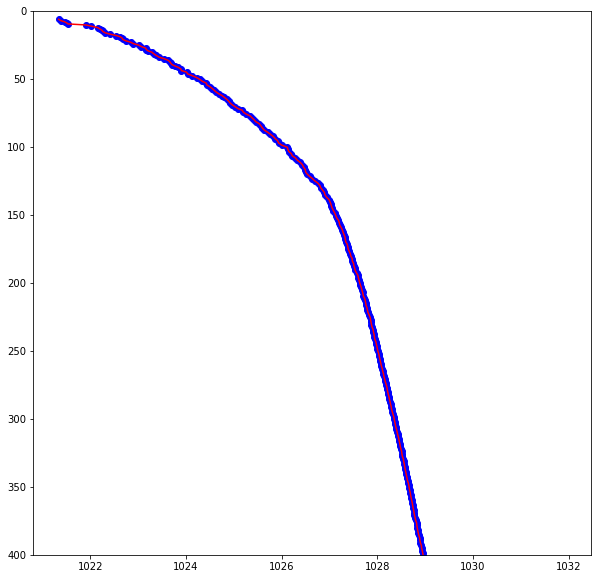

In [107]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(df['density'], df['depth'], 'bo', density, df['depth'], 'r-')
ax.set_ylim([400, 0])

In [108]:
def calc_density_mike(temperature, depth, salinity, latitude, longitude):
    """
    Calculates density given practical salinity, depth, latitude,
    and longitude using Gibbs gsw SA_from_SP and rho functions.

    Args:
        temperature (_type_): temperature (C)
        depth (_type_): depth, positive up (m)
        salinity (array): salinity
        latitude (array): latitude (decimal degrees)
        longitude (array): longitude (decimal degrees)

    Returns:
        density: Density calculated using the Gibbs GSW
    """

    # Calculates sea pressure from height using computationally-efficient 
    # 75-term expression for density, in terms of SA, CT and p 
    # (Roquet et al., 2015). 
    pressure = p_from_z(
        depth,
        latitude,
    )

    # Calculates Absolute Salinity from Practical Salinity. 
    # Since SP is non-negative by definition,
    # this function changes any negative input values of SP to be zero.
    absolute_salinity = SA_from_SP(
        salinity,
        pressure,
        longitude,
        latitude
    )

    # Calculates Conservative Temperature of seawater from in-situ temperature.
    conservative_temperature = CT_from_t(
        absolute_salinity,
        temperature,
        pressure
    )

    # Calculates in-situ density from Absolute Salinity and
    # Conservative Temperature, using the computationally-efficient expression 
    # for specific volume in terms of SA, CT and p (Roquet et al., 2015).
    density = rho(
        absolute_salinity,
        conservative_temperature,
        pressure
    )

    return density

In [109]:
density2 = calc_density_mike(df['temperature'].values, -df['depth'].values, df['salinity'].values,  df['lat'].values,  df['lon'].values)

(400.0, 0.0)

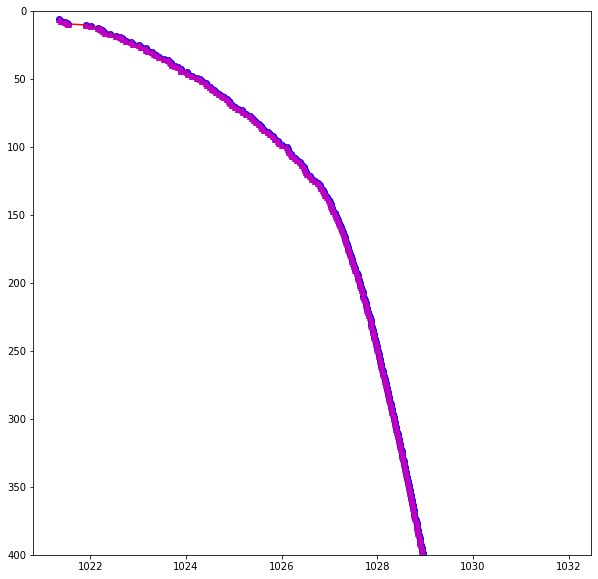

In [113]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(df['density'], df['depth'], 'bo', density, df['depth'], 'r-', density2, df['depth'], 'm^')
ax.set_ylim([400, 0])

In [116]:
from hurricanes.models import gofs

ds = gofs(rename=True)

In [118]:
tds = ds.sel(time='2022-07-09 19:58:58', method='nearest')
tds

<xarray.Dataset>
Dimensions:             (lat: 4251, lon: 4500, depth: 40)
Coordinates:
  * lat                 (lat) float64 -80.0 -79.96 -79.92 ... 89.92 89.96 90.0
  * lon                 (lon) float64 0.0 0.07996 0.16 ... 359.8 359.8 359.9
    time                datetime64[ns] 2022-07-09T21:00:00
  * depth               (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
Data variables:
    sea_surface_height  (lat, lon) float32 ...
    temperature         (depth, lat, lon) float32 ...
    water_temp_bottom   (lat, lon) float32 ...
    salinity            (depth, lat, lon) float32 ...
    salinity_bottom     (lat, lon) float32 ...
    u                   (depth, lat, lon) float32 ...
    water_u_bottom      (lat, lon) float32 ...
    v                   (depth, lat, lon) float32 ...
    water_v_bottom      (lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    model:                     GOFS

In [121]:
from hurricanes.calc import lon180to360, lon360to180

In [120]:
df['lat'].unique()[0], df['lon'].unique()[0]

(27.141176223754883, -91.45848846435548)

In [122]:
tlon = lon180to360(df['lon'].unique()[0])
tlon

268.54151153564453

In [132]:
pds = tds.interp(lon=tlon, lat=df['lat'].unique()[0], method='nearest')
pds

<xarray.Dataset>
Dimensions:             (depth: 40)
Coordinates:
    time                datetime64[ns] 2022-07-09T21:00:00
  * depth               (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
    lon                 float64 268.5
    lat                 float64 27.14
Data variables:
    sea_surface_height  float32 -0.244
    temperature         (depth) float32 32.26 30.86 30.73 30.57 ... nan nan nan
    water_temp_bottom   float32 4.131
    salinity            (depth) float32 35.76 35.76 35.76 35.81 ... nan nan nan
    salinity_bottom     float32 35.01
    u                   (depth) float32 -0.035 0.021 0.016 0.016 ... nan nan nan
    water_u_bottom      float32 -0.003
    v                   (depth) float32 0.014 -0.029 -0.024 0.0 ... nan nan nan
    water_v_bottom      float32 0.01
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    model:                     GOFS

In [133]:
pds['lon'] = lon360to180(pds['lon'])
pds

<xarray.Dataset>
Dimensions:             (depth: 40)
Coordinates:
    time                datetime64[ns] 2022-07-09T21:00:00
  * depth               (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
    lon                 float64 -91.46
    lat                 float64 27.14
Data variables:
    sea_surface_height  float32 -0.244
    temperature         (depth) float32 32.26 30.86 30.73 30.57 ... nan nan nan
    water_temp_bottom   float32 4.131
    salinity            (depth) float32 35.76 35.76 35.76 35.81 ... nan nan nan
    salinity_bottom     float32 35.01
    u                   (depth) float32 -0.035 0.021 0.016 0.016 ... nan nan nan
    water_u_bottom      float32 -0.003
    v                   (depth) float32 0.014 -0.029 -0.024 0.0 ... nan nan nan
    water_v_bottom      float32 0.01
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    model:                     GOFS

In [134]:
pds['density'] = calc_density_mike(pds['temperature'], -pds['depth'], pds['salinity'], pds['lat'], pds['lon'])

In [135]:
pds

<xarray.Dataset>
Dimensions:             (depth: 40)
Coordinates:
    time                datetime64[ns] 2022-07-09T21:00:00
  * depth               (depth) float64 0.0 2.0 4.0 6.0 ... 3e+03 4e+03 5e+03
    lon                 float64 -91.46
    lat                 float64 27.14
Data variables:
    sea_surface_height  float32 -0.244
    temperature         (depth) float32 32.26 30.86 30.73 30.57 ... nan nan nan
    water_temp_bottom   float32 4.131
    salinity            (depth) float32 35.76 35.76 35.76 35.81 ... nan nan nan
    salinity_bottom     float32 35.01
    u                   (depth) float32 -0.035 0.021 0.016 0.016 ... nan nan nan
    water_u_bottom      float32 -0.003
    v                   (depth) float32 0.014 -0.029 -0.024 0.0 ... nan nan nan
    water_v_bottom      float32 0.01
    density             (depth) float64 1.022e+03 1.022e+03 ... nan nan
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file
    history:                   archv2ncdf2d
    comment:                   p-grid
    field_type:                instantaneous
    Conventions:               CF-1.6 NAVO_netcdf_v1.1
    model:                     GOFS

(400.0, 0.0)

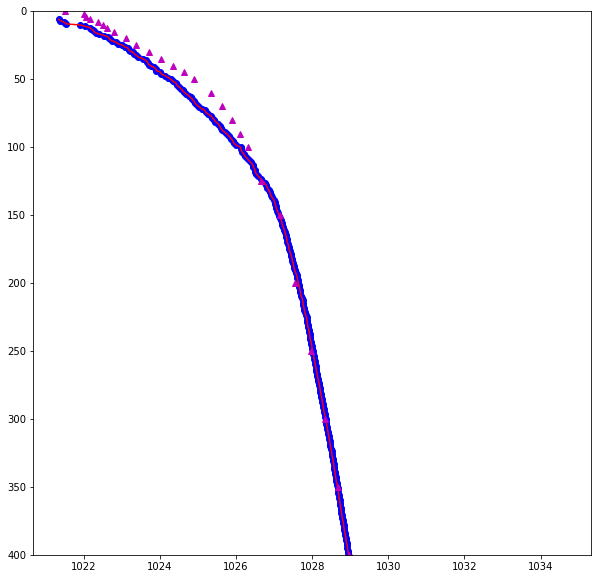

In [136]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(df['density'], df['depth'], 'bo', density, df['depth'], 'r-', pds['density'], pds['depth'], 'm^')
ax.set_ylim([400, 0])